In [2]:
import numpy as np
import pandas as pd
# import FinanceDataReader as fdr
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import time
import datetime
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [21]:
class Stock():
    def __init__(self, ticker):
        self.ticker = ticker
        self.df = pdr.get_data_yahoo(ticker)

    # df 길이 통일
    def set_df_length(self, length):
        self.df = self.df.iloc[-length:]

    # 레버리지 변동성 계산
    def get_leverage_change(self):
        self.df["change1"] = self.df["Adj Close"].shift(-1)/self.df["Adj Close"]
        self.df["change2"] = 1 + (self.df["change1"]-1)*2
        self.df["change3"] = 1 + (self.df["change1"]-1)*3

    # 전체금액 거치식
    def get_buy_and_hold(self):
        self.df["buy and hold return1"] = 10000 * len(self.df) * self.df["change1"].cumprod()
        self.df["buy and hold return2"] = 10000 * len(self.df) * self.df["change2"].cumprod()
        self.df["buy and hold return3"] = 10000 * len(self.df) * self.df["change3"].cumprod()

        self.df["buy and hold return1"] = self.df["buy and hold return1"].shift(1)
        self.df["buy and hold return2"] = self.df["buy and hold return2"].shift(1)
        self.df["buy and hold return3"] = self.df["buy and hold return3"].shift(1)

        self.df["buy and hold return1"].iloc[0] = 10000 * len(self.df)
        self.df["buy and hold return2"].iloc[0] = 10000 * len(self.df)
        self.df["buy and hold return3"].iloc[0] = 10000 * len(self.df)

    # 만원씩 적립
    def get_cost_averaging(self):
        return1 = [0 for _ in range(len(self.df))]
        return2 = [0 for _ in range(len(self.df))]
        return3 = [0 for _ in range(len(self.df))]

        return1[0] = 10000
        return2[0] = 10000
        return3[0] = 10000

        change1 = self.df["change1"].values
        change2 = self.df["change2"].values
        change3 = self.df["change3"].values

        for i in tqdm(range(1, len(self.df))):
            return1[i] = return1[i-1]*change1[i-1]+10000
            return2[i] = return2[i-1]*change2[i-1]+10000
            return3[i] = return3[i-1]*change3[i-1]+10000

        self.df["cost averaging return1"] = return1
        self.df["cost averaging return2"] = return2
        self.df["cost averaging return3"] = return3

In [39]:
ticker_list = ["SPY", "QQQ"]
stock_list = [Stock(ticker) for ticker in ticker_list]
minimum_length = min([len(stock.df) for stock in stock_list])
[stock.set_df_length(minimum_length) for stock in stock_list]
[stock.get_leverage_change() for stock in stock_list]
[stock.get_buy_and_hold() for stock in stock_list]
[stock.get_cost_averaging() for stock in stock_list]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


100%|██████████| 6064/6064 [00:00<00:00, 362755.79it/s]


[None, None]

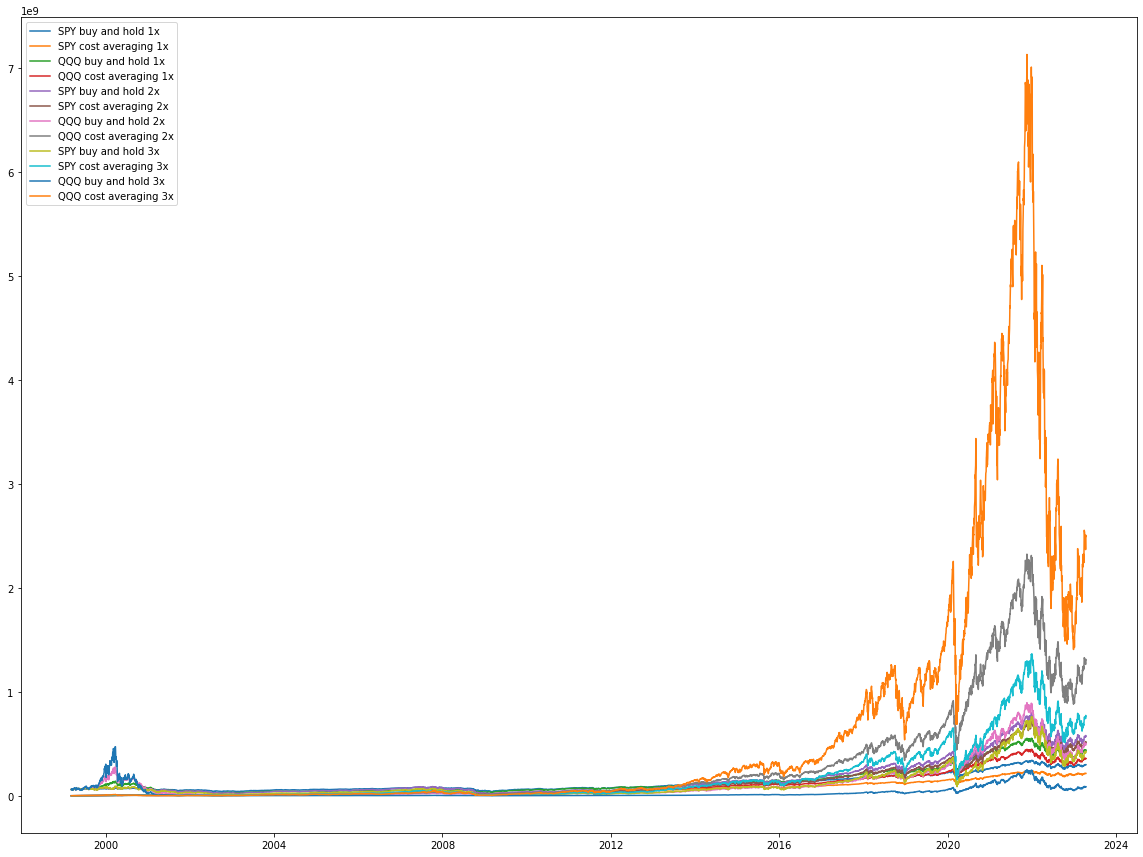

In [40]:
# 전체 수익률 figure

plt.figure(figsize=(20, 15))

for leverage in range(3):
    for stock_index in range(len(stock_list)):
        plt.plot(stock_list[stock_index].df[f"buy and hold return{leverage+1}"], label=f"{stock_list[stock_index].ticker} buy and hold {leverage+1}x")
        plt.plot(stock_list[stock_index].df[f"cost averaging return{leverage+1}"], label=f"{stock_list[stock_index].ticker} cost averaging {leverage+1}x")

plt.legend()
plt.show()

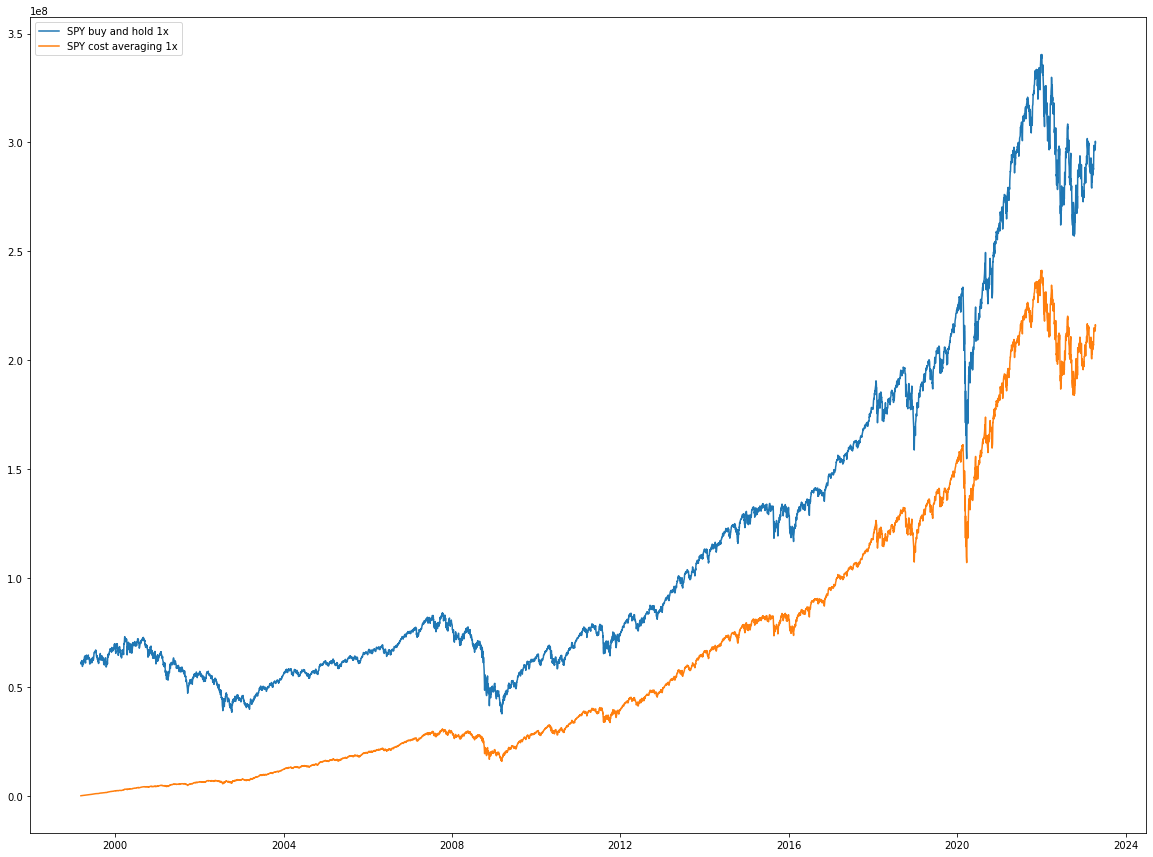

In [43]:
# spy 1배수 거치식 vs 적립식 비교

plt.figure(figsize=(20, 15))

plt.plot(stock_list[0].df[f"buy and hold return1"], label=f"{stock_list[0].ticker} buy and hold 1x")
plt.plot(stock_list[0].df[f"cost averaging return1"], label=f"{stock_list[0].ticker} cost averaging 1x")

plt.legend()
plt.show()

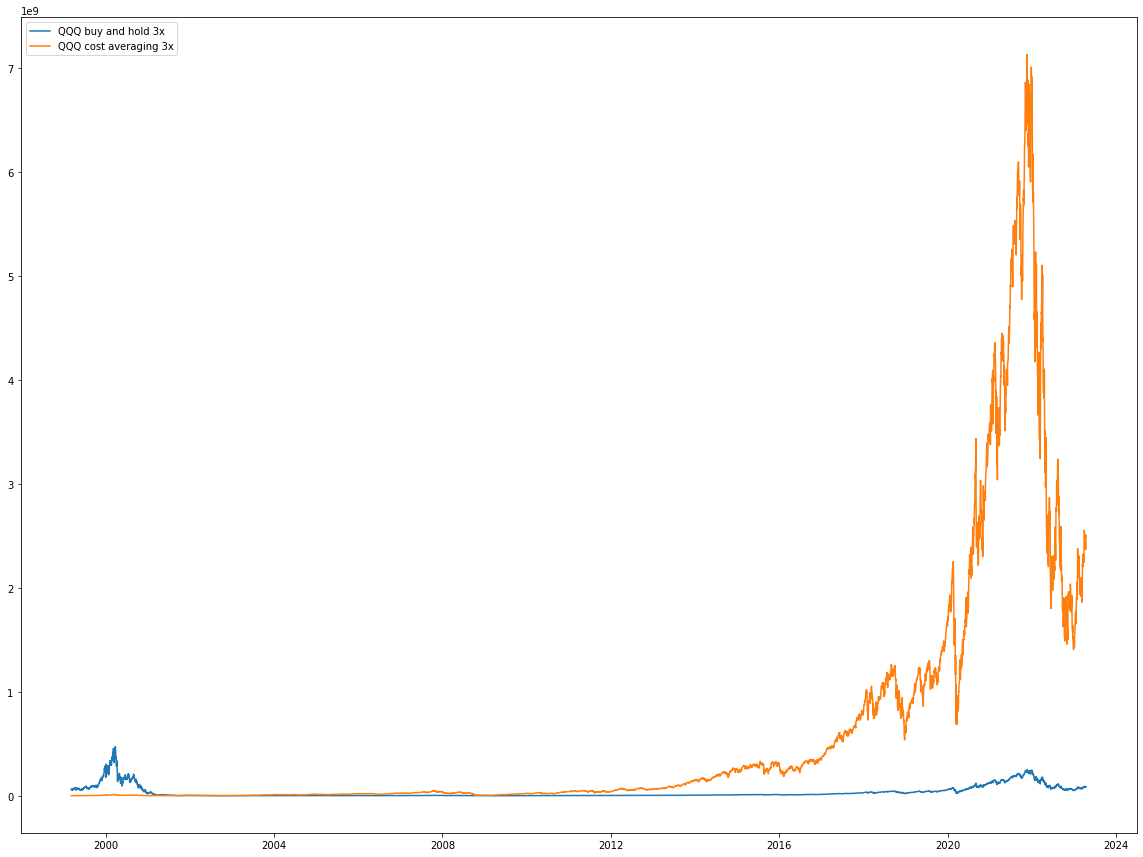

In [41]:
# qqq 3배수 거치식 vs 적립식 비교

plt.figure(figsize=(20, 15))

plt.plot(stock_list[1].df[f"buy and hold return3"], label=f"{stock_list[1].ticker} buy and hold 3x")
plt.plot(stock_list[1].df[f"cost averaging return3"], label=f"{stock_list[1].ticker} cost averaging 3x")

plt.legend()
plt.show()